In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=08472e81180ecceef216c01b8330383c4d8a36faec2ce9fa939394256b1093e1
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


3.763364941634249


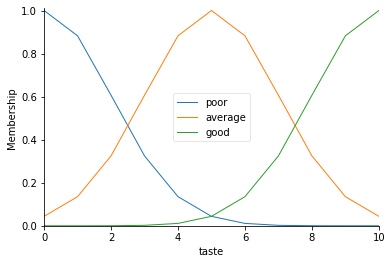

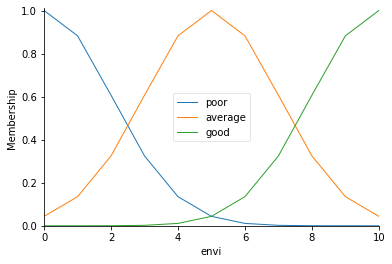

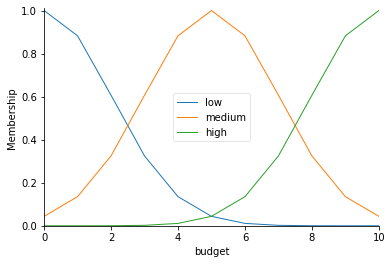

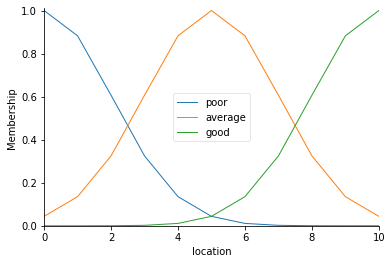

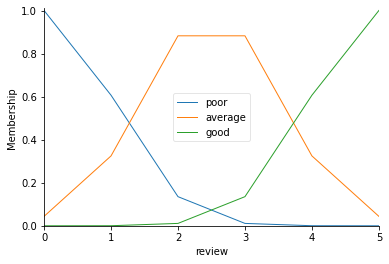

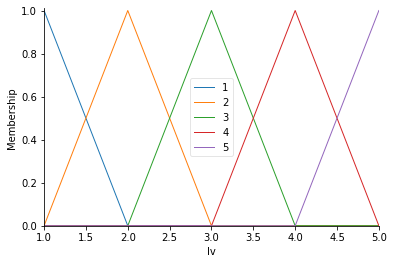

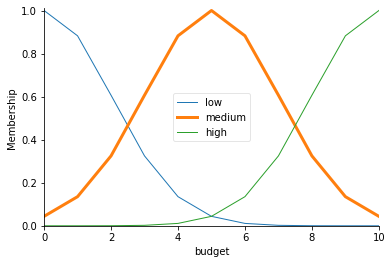

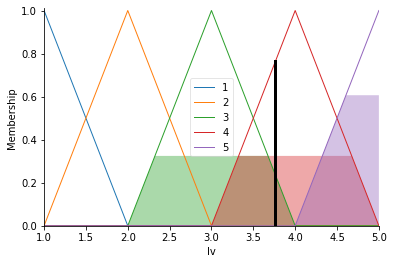

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt
x = np.arange(0,11,1)

taste = ctrl.Antecedent(np.arange(0,11,1),'taste')
envi = ctrl.Antecedent(np.arange(0,11,1),'envi')
budget = ctrl.Antecedent(np.arange(0,11,1),'budget')
location = ctrl.Antecedent(np.arange(0,11,1),'location')
review = ctrl.Antecedent(np.arange(0,6,1),'review')
lv = ctrl.Consequent(np.arange(1,6,1),'lv')


taste['poor'] = fuzz.gaussmf(taste.universe,0,2)
taste['average'] = fuzz.gaussmf(taste.universe,5,2)
taste['good'] = fuzz.gaussmf(taste.universe,10,2)

envi['poor'] = fuzz.gaussmf(envi.universe,0,2)
envi['average'] = fuzz.gaussmf(envi.universe,5,2)
envi['good'] = fuzz.gaussmf(envi.universe,10,2)

budget['low'] = fuzz.gaussmf(budget.universe,0,2)
budget['medium'] = fuzz.gaussmf(budget.universe,5,2)
budget['high'] = fuzz.gaussmf(budget.universe,10,2)

location['poor'] = fuzz.gaussmf(location.universe,0,2)
location['average'] = fuzz.gaussmf(location.universe,5,2)
location['good'] = fuzz.gaussmf(location.universe,10,2)

review['poor'] = fuzz.gaussmf(review.universe,0,1)
review['average'] = fuzz.gaussmf(review.universe,2.5,1)
review['good'] = fuzz.gaussmf(review.universe,5,1)

lv['1'] = fuzz.trimf(lv.universe,[1,1,2])
lv['2'] = fuzz.trimf(lv.universe,[1,2,3])
lv['3'] = fuzz.trimf(lv.universe,[2,3,4])
lv['4'] = fuzz.trimf(lv.universe,[3,4,5])
lv['5'] = fuzz.trimf(lv.universe,[4,5,5])

taste.view()
envi.view()
budget.view()
location.view()
review.view()
lv.view()
budget['medium'].view()

rule1 = ctrl.Rule(taste['poor']  & envi['poor'] & budget['low']  & location['poor'] & review['poor'],lv['1'])
rule2 = ctrl.Rule(taste['poor']  & envi['poor'] & review['poor'],lv['1'])
rule3 = ctrl.Rule(taste['average']  & envi['average'] & budget['medium']  & location['average'] & review['average'],lv['3'])
rule4 = ctrl.Rule(taste['good']  & envi['good'] & budget['high']  & location['good'] & review['good'],lv['5'])
rule5 = ctrl.Rule(taste['average']  & envi['poor'] & budget['low']  & location['poor'] & review['average'],lv['2'])
rule6 = ctrl.Rule(taste['average']  & envi['poor'] & budget['medium']  & location['poor'] & review['average'],lv['2'])
rule7 = ctrl.Rule(taste['average']  & envi['poor'] & budget['medium']  & location['average'] & review['average'],lv['3'])
rule8 = ctrl.Rule(taste['average']  & envi['average'] & budget['medium']  & location['poor'] & review['average'],lv['3'])
rule9 = ctrl.Rule(taste['good']  & envi['average'] & budget['medium']  & location['average'] & review['average'],lv['4'])
rule10 = ctrl.Rule(taste['good']  & envi['good'] & budget['medium']  & location['average'] & review['good'],lv['4'])
rule11 = ctrl.Rule(taste['good']  & envi['average'] & budget['medium']  & location['good'] & review['good'],lv['4'])
rule12 = ctrl.Rule(taste['good']  & envi['average'] & budget['high']  & location['good'] & review['good'],lv['5'])
rule13 = ctrl.Rule(taste['good']  & envi['average'] & budget['high']  & location['average'] & review['good'],lv['5'])
rule14 = ctrl.Rule(taste['good']  & envi['good'] & budget['high']  & location['average'] & review['good'],lv['5'])

lvling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
lvling = ctrl.ControlSystemSimulation(lvling_ctrl)

lvling.input['taste'] = 8
lvling.input['envi'] = 8
lvling.input['budget'] = 8
lvling.input['location'] = 8
lvling.input['review'] = 4
lvling.compute()
print(lvling.output['lv'])
lv.view(sim=lvling)